In [23]:
import numpy as np
import pandas as pd

import graphviz

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [68]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris['feature_names']
target_names = iris['target_names']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [73]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=3, min_samples_leaf=5)
clf_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=1)

In [74]:
y_pred = clf_model.predict(X_test)

In [75]:
metrics.accuracy_score(y_test, y_pred)

0.9555555555555556

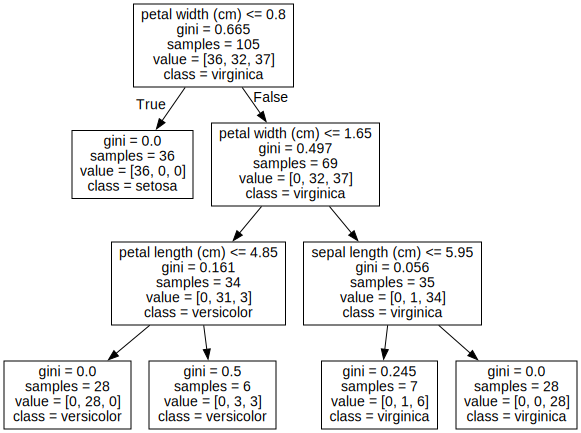

In [76]:
dot_data = tree.export_graphviz(clf_model, feature_names=feature_names, class_names=target_names)
graph = graphviz.Source(dot_data)
graph


In [77]:
importance = clf_model.feature_importances_
importance

array([0.00350826, 0.        , 0.03792015, 0.95857159])

In [78]:
sorted_imoptance = pd.DataFrame({'feature': feature_names, 'importance': importance}).sort_values('importance', ascending=False)
sorted_imoptance

,feature,importance
3,petal width (cm),0.958572
2,petal length (cm),0.037920
0,sepal length (cm),0.003508
1,sepal width (cm),0.000000
